In [39]:
# wrangling
from pydataset import data
import pandas as pd
import numpy as np

# exploring
import scipy.stats as stats

# visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.linear_model import LinearRegression

### Acquire df

In [4]:
df = data("faithful")

### Split df into x_train, x_test, y_train, y_test

In [5]:
train, test = train_test_split(df, test_size=.30, random_state=123)

### Explore df

In [6]:
train.head()

,eruptions,waiting
138,4.933,86
63,1.750,48
82,4.333,82
259,2.000,56
55,1.733,54


In [7]:
train.describe()

,eruptions,waiting
count,190.000000,190.000000
mean,3.405768,70.142105
std,1.153422,13.380307
min,1.600000,43.000000
25%,2.087250,58.250000
50%,3.866500,75.000000
75%,4.412750,81.000000
max,5.067000,92.000000


In [9]:
df.corr()

,eruptions,waiting
eruptions,1.000000,0.900811
waiting,0.900811,1.000000


### Run a Pearson's r test for the two variables

In [10]:
r, p = stats.pearsonr(train.waiting, train.eruptions)

print(f"The r value is: {r}")
print(f"The p value is: {p}")

The r value is: 0.8939001534910027
The p value is: 2.0006639287797012e-67


### Visualize df

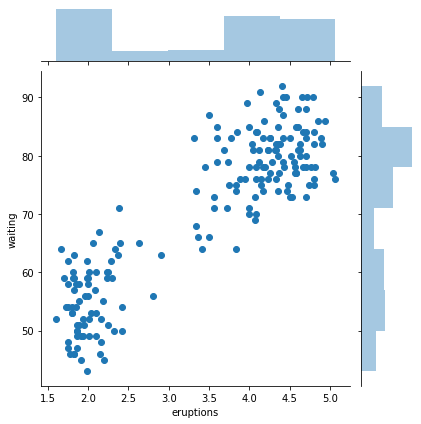

In [12]:
sns.jointplot(data=train, x="eruptions", y="waiting")
#plt.scatter()

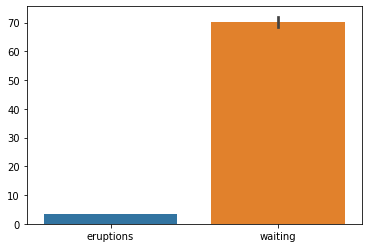

In [13]:
sns.barplot(data=train)

### Model df

In [14]:
# create x and y variables
x_train = train[["waiting"]]
y_train = train[["eruptions"]]

x_test = test[["waiting"]]
y_test = test[["eruptions"]]

In [15]:
# create the LR object

lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [20]:
# fit/train the model
model = lm1.fit(x_train, y_train)

In [24]:
# in-sample prediction
y_pred_lm1 = model.predict(x_train)

In [25]:
actual = y_train

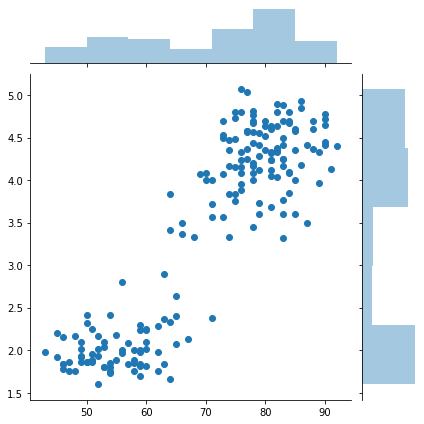

In [26]:
sns.jointplot(x_train, actual)

Text(50, 5, 'rmse: 0.5157')

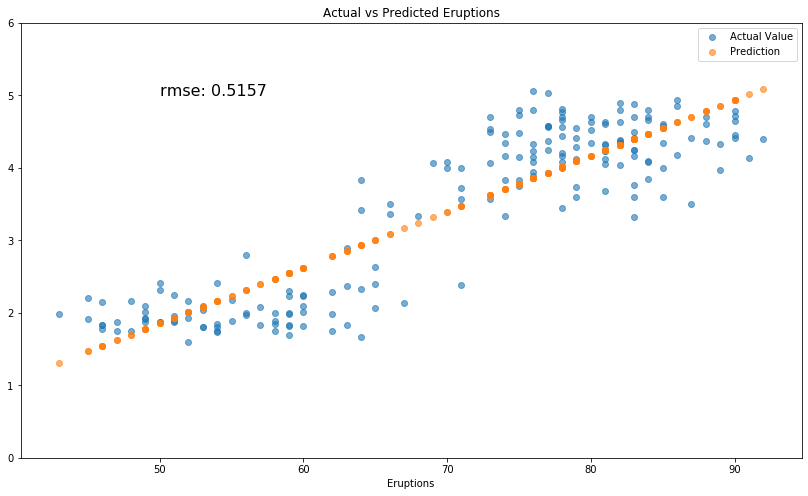

In [38]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_pred_lm1)
rmse = sqrt(mse)

plt.figure(figsize=(14, 8))
plt.scatter(x_train, y_train, label="Actual Value", alpha=.6)
plt.scatter(x_train, y_pred_lm1, label="Prediction", alpha=.6)
plt.xlabel("Waiting")
plt.xlabel("Eruptions")
plt.title("Actual vs Predicted Eruptions")
plt.legend()
plt.yticks(range(0,7))
plt.text(50, 5, f"rmse: {rmse:.4f}", size=16)

In [ ]:
pd.DataFrame({'actual': y_train,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_baseline_unscaled.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

min, max = 60, 100
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')